In [1]:
import numpy as np

# Create the observations as a numpy array
observations = np.array([
    [3, 4, 'Red'],
    [2, 2, 'Red'],
    [4, 4, 'Red'],
    [1, 4, 'Red'],
    [2, 1, 'Blue'],
    [4, 3, 'Blue'],
    [4, 1, 'Blue']
])

# Print the array to verify
print(observations)
print(f"Shape of the array: {observations.shape}")
print(f"Data type of the array: {observations.dtype}")


[['3' '4' 'Red']
 ['2' '2' 'Red']
 ['4' '4' 'Red']
 ['1' '4' 'Red']
 ['2' '1' 'Blue']
 ['4' '3' 'Blue']
 ['4' '1' 'Blue']]
Shape of the array: (7, 3)
Data type of the array: <U21


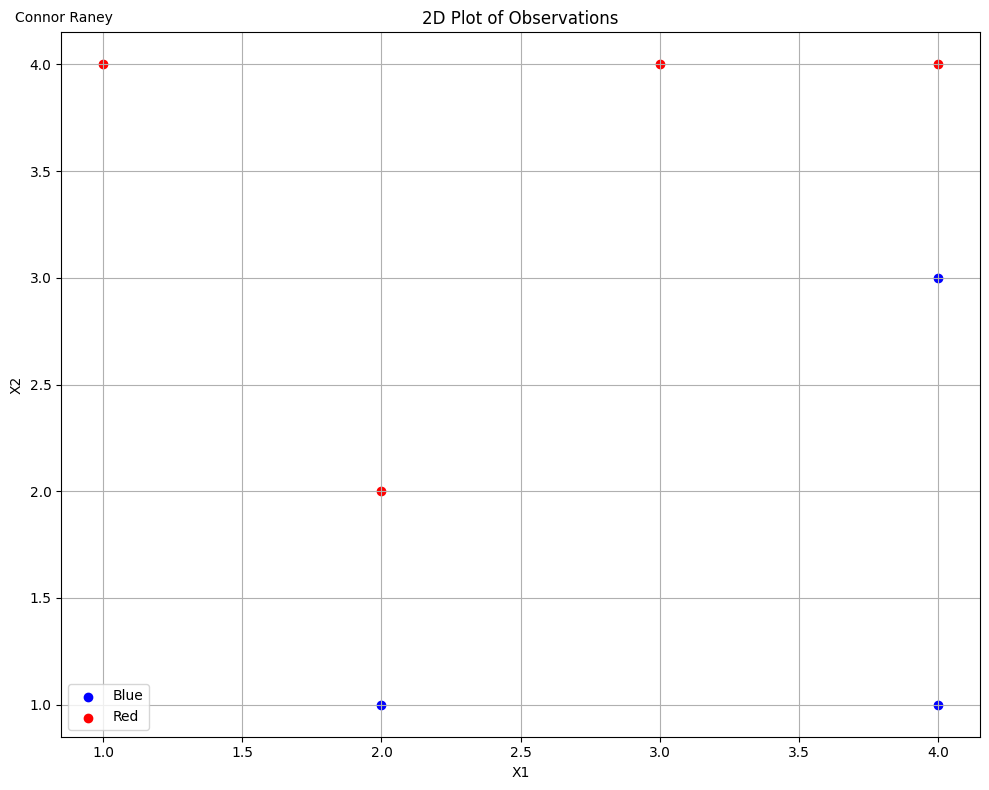

In [2]:
import matplotlib.pyplot as plt

# Separate the features and labels
X = observations[:, :2].astype(float)  # Convert to float for plotting
y = observations[:, 2]

# Create a scatter plot
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    mask = y == label
    color = 'red' if label == 'Red' else 'blue'
    plt.scatter(X[mask, 0], X[mask, 1], label=label, color=color)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Plot of Observations')
plt.legend()
plt.grid(True)

# Add name outside the plot area
plt.gcf().text(0.02, 0.98, 'Connor Raney', fontsize=10, 
               verticalalignment='top', horizontalalignment='left')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


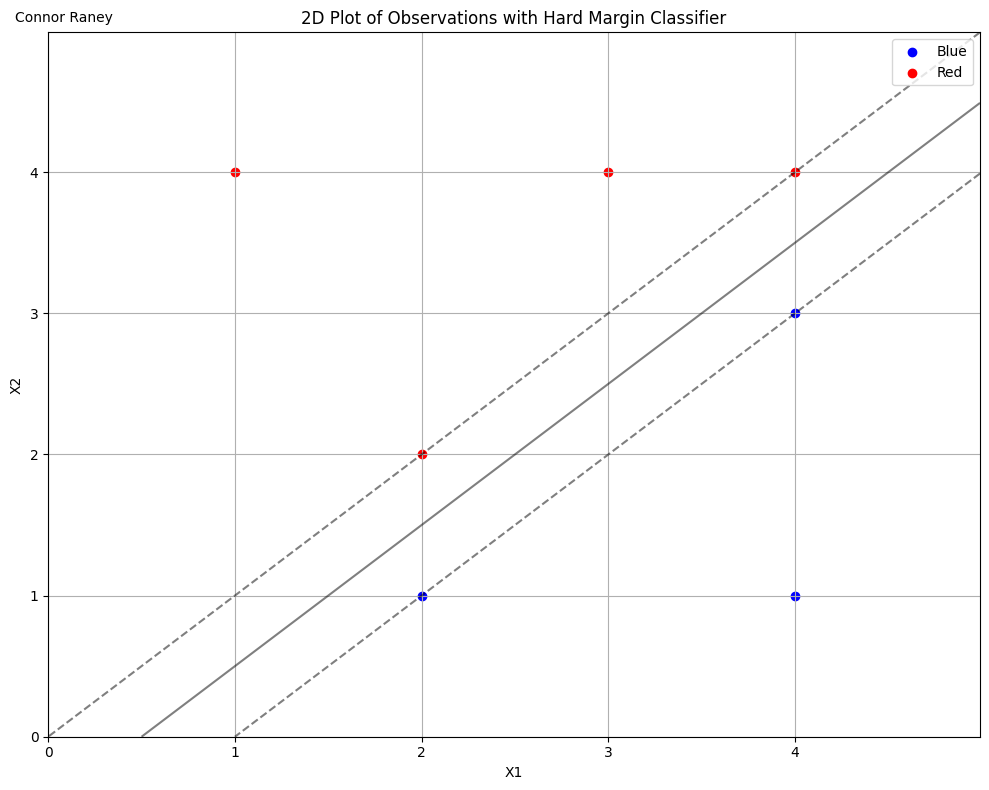

Equation of the hyperplane: X2 = 1.00 * X1 + -0.50


In [3]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Separate the features and labels
X = observations[:, :2].astype(float)
y = observations[:, 2]

# Convert labels to binary (0 and 1)
y_binary = np.where(y == 'Red', 0, 1)

# Create and fit the SVM model
clf = svm.SVC(kernel='linear', C=1e10)  # High C for hard margin
clf.fit(X, y_binary)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate the range of x and y values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Calculate the decision boundary
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    mask = y == label
    color = 'red' if label == 'Red' else 'blue'
    plt.scatter(X[mask, 0], X[mask, 1], label=label, color=color)

# Plot the decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Plot of Observations with Hard Margin Classifier')
plt.legend()
plt.grid(True)

# Add name outside the plot area
plt.gcf().text(0.02, 0.98, 'Connor Raney', fontsize=10, 
               verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.show()

# Calculate the equation of the hyperplane
a = -w[0] / w[1]
xx_hyperplane = np.linspace(x_min, x_max)
yy_hyperplane = a * xx_hyperplane - (b) / w[1]

# Print the equation of the hyperplane
print(f"Equation of the hyperplane: X2 = {a:.2f} * X1 + {-b/w[1]:.2f}")
